In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/Users/Apple/Downloads/Python.csv')

In [3]:
print(data)

     Uang Saku  Harga Pembelian
0           50               20
1           40               20
2           70               35
3           50               10
4           25               15
..         ...              ...
171         50               10
172         50               15
173         50               15
174         45               15
175         50               25

[176 rows x 2 columns]


In [4]:
data.head()

,Uang Saku,Harga Pembelian
0,50,20
1,40,20
2,70,35
3,50,10
4,25,15


In [5]:
data.tail()

,Uang Saku,Harga Pembelian
171,50,10
172,50,15
173,50,15
174,45,15
175,50,25


In [6]:
data.describe()

,Uang Saku,Harga Pembelian
count,176.000000,176.000000
mean,54.181818,24.625000
std,24.022868,14.862657
min,10.000000,5.000000
25%,40.000000,15.000000
50%,50.000000,20.000000
75%,61.250000,30.000000
max,175.000000,85.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Uang Saku        176 non-null    int64
 1   Harga Pembelian  176 non-null    int64
dtypes: int64(2)
memory usage: 2.9 KB


In [8]:
data.columns=['Uang_Saku','Harga_Pembelian']
col_continuous=['Uang_Saku','Harga_Pembelian']

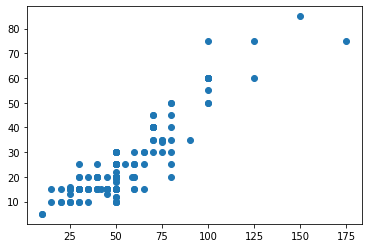

In [9]:
plt.scatter(x='Uang_Saku',y='Harga_Pembelian',data=data)

In [10]:
corr=data.corr()
corr

,Uang_Saku,Harga_Pembelian
Uang_Saku,1.000000,0.889783
Harga_Pembelian,0.889783,1.000000


In [11]:
corr**2

,Uang_Saku,Harga_Pembelian
Uang_Saku,1.000000,0.791714
Harga_Pembelian,0.791714,1.000000


In [12]:
corr['Harga_Pembelian'].sort_values(ascending= False)

Harga_Pembelian    1.000000
Uang_Saku          0.889783
Name: Harga_Pembelian, dtype: float64

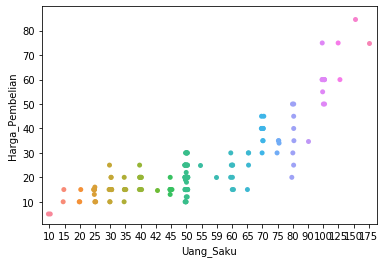

In [13]:
sns.stripplot(x='Uang_Saku', y='Harga_Pembelian',data=data)

In [14]:
x = data['Uang_Saku'].values.reshape(-1,1)
y = data['Harga_Pembelian'].values.reshape(-1,1)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [16]:
from sklearn.linear_model import LinearRegression
r = LinearRegression()
r.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred = r.predict(x_test)

In [18]:
df = pd.DataFrame({'Uang_Saku' : x_test.flatten(), 'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [19]:
data.tail()

,Uang_Saku,Harga_Pembelian
171,50,10
172,50,15
173,50,15
174,45,15
175,50,25


In [20]:
df

,Uang_Saku,Actual,Predicted
0,35,10,13.578225
1,75,35,36.566420
2,25,10,7.831176
3,45,13,19.325273
4,80,50,39.439945
5,35,15,13.578225
6,50,20,22.198798
7,70,40,33.692896
8,70,35,33.692896
9,50,20,22.198798


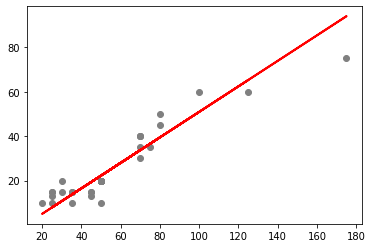

In [21]:
plt.scatter(x_test, y_test, color = 'gray')
plt.plot(x_test, y_pred, color = 'red', linewidth = 2)
plt.show()

In [22]:
r.intercept_


array([-6.53644654])

In [23]:
r.coef_

array([[0.57470489]])

In [24]:
from sklearn import metrics
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE :  4.808438652316314
MSE : 36.47268762668484
RMSE : 6.039262175687096
